<h1> Questions </h1>
<h2>Krishan </h2>
<li> Question 1: How would I  utilize count to display most relevant job skills?<li> Question 2: What is most comprehensive to display what degree a user should get based upon their interest in skills along with the types of jobs they should go for?

<h2> Lucas </h2>
<li> What is the BEST / MOST ACCURATE Quantifier to ouput for the user based upon their input?
<li> How would I go about QUANTIFYING relevance in this use case?

<h2>Nikhita </h2>
<li> Question 1: What is the most efficient way to show the most amount of information without overwhelming the user?
<li> Question 2: How can we integrate interactive filtering and drill-down features to allow users to explore additional details only when needed?

<h2>Michelle </h2>
<li> What is the most comprehensive way to display the most used skills for each job field?
<li> How relevant are the skills students learn within their courses to their respective job fields?

## Group Hypothesis:
A dynamic, interactive data visualization platform that integrates robust quantifiers and tailored filtering will enable users to accurately identify and explore the most relevant job skills across different degree selections and job fields. By effectively balancing comprehensive data presentation with user-friendly drill-down capabilities, the platform is hypothesized to empower users to make more informed academic and career decisions.


## Michelle

- What is the most comprehensive way to display the most used skill for each job field?
- __Answer:__ To support our hypothesis, I analyzed our web scraped datasets to extract relevant and necessary information to categorize job skills and job titles based on majors/job fields (e.g. Software Development, Data Analysis, etc.). After I extracted the necessary information for each field, I gathered the top 10 job titles and top 10 skills and created a CSV for Krishan and Lucas to use in the website and for Nikhita to use for visualizations.

- How relevant are the skills students learn within their courses to their respective job fields?
- __Answer:__ To answer this question and provide insights to students with our website, the team and I have analyzed json.js files created by the previous semester's teams to ensure that each course for each major contains relevant and applicable skills within each field. Using the information from the job posting sites, we can find the overlap between relevant course skills to ensure that students are getting the skills to attain the job(s) they want most.

##Lucas


- What is the BEST / MOST ACCURATE Quantifier to ouput for the user based upon their input?

- **Answer**: In order to best define this particular characteristic, it was best to source my answer both from the data itself and the qualifications from those viewing and critiquing our deliverable thus far. According to both the attributes available to me and outside input, it became clear that the most comprehensive and helpful attributes of the dataset to relay were the most relevant courses for the user to take, and real-life positions within the market that have been posted online for public view.

- How would I go about QUANTIFYING relevance in this use case?

- **Answer**: The way to best approach quantifying relevance within the scope of this project was best defined under the overarching term of proportions. Put simply, the bot that has been developed simply analyzes the users' input as a list of keywords. Those keywords are then compared to similar lists of keywords that correlate to both classes as well as job listings. Based upon the listings in both categories with the greatest proportion of their keywords having a presence within the user-supplied list, those positions are returned. Although somwhat simplified, that is the core of what is happening in the program.

<h1>Krishan</h1>
<h2>Question 1: How would I utilize count to display most relevant job skills?</h2>
<p> <b>Answer: </b> In order to do this, I would have to get a list of all job skills for each field. Then I would go through each job description and search for those skills and have a count for each occurence of that job skill keyword. In the end, it would return all the top skills in descending order from count. For the website, we would only extract the top 10 skills and graph them as a stacked bar chart and then list the course(s) that offer those skills</p>

<h2>Question 2: What is most comprehensive to display what degree a user should get based upon their interest in skills along with the types of jobs they should go for?</h2>

<p> <b>Answer:</b> To articulate this, we must first extract the skills from each job description and then map them to a job field like Data Analyst/Scientist, Software Dev, etc. From there, we would need to do some kind of proportion. With the number of skills the user provides, we need to figure out which job field has the highest percentage of those inputted skills and then that job field would need to be printed out. Additionally, we would also print out the jobs that also offer the highest percentage of the inputted skills. </p>

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, re
import plotly.express as px
from nltk.probability import FreqDist
from IPython import display

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths (update with your actual Google Drive path)
indeed_path = "/content/drive/My Drive/indeed_cleaned.csv"
linkedin_path = "/content/drive/My Drive/linkedin_cleaned.csv"
glassdoor_path = "/content/drive/My Drive/glassdoor_cleaned.csv"
output_path = "/content/drive/My Drive/merged_jobs.csv"

# Load datasets
indeed_df = pd.read_csv(indeed_path, usecols=['company_name', 'job_title', 'job_type', 'description'])
linkedin_df = pd.read_csv(linkedin_path, usecols=['job_title', 'company_name', 'job_summary', 'job_seniority_level', 'job_function', 'job_employment_type', 'job_industries'])
glassdoor_df = pd.read_csv(glassdoor_path, usecols=['company_name', 'job_title', 'job_overview', 'company_industry', 'company_sector'])

# Rename columns for consistency
indeed_df.rename(columns={'description': 'job_description'}, inplace=True)
linkedin_df.rename(columns={'job_summary': 'job_description', 'job_employment_type': 'job_type'}, inplace=True)
glassdoor_df.rename(columns={'job_overview': 'job_description'}, inplace=True)

# Merge datasets on 'company_name' and 'job_title'
merged_df = pd.merge(indeed_df, linkedin_df, on=['company_name', 'job_title'], how='outer')
merged_df = pd.merge(merged_df, glassdoor_df, on=['company_name', 'job_title'], how='outer')

# Save to Google Drive
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved to: {output_path}")


Mounted at /content/drive
Merged dataset saved to: /content/drive/My Drive/merged_jobs.csv


In [ ]:
# Combine job_description columns, taking the first non-null value
merged_df['job_description'] = merged_df[['job_description_x', 'job_description_y', 'job_description']].bfill(axis=1).iloc[:, 0]

# Drop old job_description columns
merged_df.drop(columns=['job_description_x', 'job_description_y'], inplace=True)

# Save the cleaned dataset
output_path = "/content/drive/My Drive/merged_jobs_cleaned.csv"
merged_df.to_csv(output_path, index=False)

print(f"Cleaned merged dataset saved to: {output_path}")


Cleaned merged dataset saved to: /content/drive/My Drive/merged_jobs_cleaned.csv


In [ ]:
# Combine job_description columns, taking the first non-null value
merged_df['job_type'] = merged_df[['job_type_x', 'job_type_y', ]].bfill(axis=1).iloc[:, 0]

# Drop old job_description columns
merged_df.drop(columns=['job_type_x', 'job_type_y'], inplace=True)

# Save the cleaned dataset
output_path = "/content/drive/My Drive/merged_jobs_cleaned.csv"
merged_df.to_csv(output_path, index=False)

print(f"Cleaned merged dataset saved to: {output_path}")


Cleaned merged dataset saved to: /content/drive/My Drive/merged_jobs_cleaned.csv


Dropping rows  with job skill levels above mid-senior
**Only including internship, entry, associate, and mid-senior level positions

In [ ]:
exclude_terms = ['director', 'executive', 'specialist', 'phd']
exclude_terms2 = ['director', 'executive', 'senior', 'phd', 'sr', 'sr.']

# Drop rows where 'job_seniority_level' contains any of the keywords
merged_df = merged_df[~merged_df['job_seniority_level'].str.contains('|'.join(exclude_terms), case=False, na=False)]


# Drop rows where 'job_title' contains any of the keywords
merged_df = merged_df[~merged_df['job_title'].str.contains('|'.join(exclude_terms2), case=False, na=False)]
merged_df.head()

output_path = "/content/drive/My Drive/merged_jobs_cleaned.csv"
merged_df.to_csv(output_path, index=False)

print(f"Cleaned merged dataset saved to: {output_path}")


Cleaned merged dataset saved to: /content/drive/My Drive/merged_jobs_cleaned.csv


## For Software Development

In [ ]:
# Define software development skills (Fixed missing commas)
software_dev_skills = [
    # Programming Languages
    "Python", "JavaScript", "Java", "C#", "C++", "TypeScript", "Ruby", "Swift", "Kotlin", "Go", "Rust", "PHP", "SQL",

    # Web Development
    "HTML", "CSS", "React", "Angular", "Vue.js", "Node.js", "Django", "Flask", "Spring Boot", "ASP.NET", "GraphQL",

    # Databases
    "MySQL", "PostgreSQL", "MongoDB", "SQLite", "Redis", "Firebase", "DynamoDB", "SQL Server", "Oracle", "Cassandra", "NoSQL",

    # Cloud & DevOps
    "AWS", "Azure", "Google Cloud Platform", "Docker", "Kubernetes", "Terraform", "CI/CD", "Jenkins", "GitHub Actions", "Cloud", "Cloud Computing", "AI",

    # Version Control & Collaboration
    "Git", "GitHub", "GitLab", "Bitbucket",

    # Mobile Development
    "Android", "iOS", "Flutter", "React Native", "Xamarin",

    # Testing & Debugging
    "JUnit", "Selenium", "Cypress", "PyTest", "Mocha", "Jest", "Postman",

    # Operating Systems & Environments
    "Linux", "Windows", "macOS", "Bash", "PowerShell", "Unix",

    # IDEs & Code Editors
    "VS Code", "IntelliJ IDEA", "PyCharm", "Eclipse", "Android Studio", "Xcode", "NetBeans",

    # Software Development Concepts
    "Object-Oriented Programming (OOP)", "Functional Programming", "Design Patterns", "Agile", "Scrum", "TDD (Test-Driven Development)",
    "Microservices", "REST API", "GraphQL API", "Multithreading", "Concurrency", "Data Structures", "Algorithms", "Machine Learning"

    # General Soft Dev terms
    "Engineer", "Developer", "Dev", "Technology", "Project Manager", "Project", "Development", "Management"
]


sd_keyword_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in software_dev_skills
}

sd_keyword_df = pd.DataFrame(list(sd_keyword_counts.items()), columns=['Keyword', 'Count'])

sd_keyword_df = sd_keyword_df.sort_values(by='Count', ascending=False)
sd_keyword_df.head(30)



,Keyword,Count
46,AI,2484
9,Go,1871
91,Dev,1821
96,Management,1355
95,Development,1322
94,Project,1037
92,Technology,822
35,AWS,607
47,Git,601
10,Rust,415


## SoftDev Job Titles

In [ ]:
software_dev_job_titles = [
    # General Software Engineering Roles
    "Software Engineer", "Software Developer", "Full Stack Developer", "Backend Developer",
    "Frontend Developer", "Application Developer", "Software Architect", "Embedded Software Engineer",

    # Web Development
    "Web Developer", "Front End Engineer", "Back End Engineer", "Full Stack Engineer",
    "JavaScript Developer", "UI Developer", "UX Developer",

    # Mobile Development
    "Mobile Developer", "Android Developer", "iOS Developer", "Flutter Developer",
    "React Native Developer", "Mobile Application Developer",

    # DevOps & Cloud Engineering
    "DevOps Engineer", "Cloud Engineer", "Site Reliability Engineer (SRE)", "Infrastructure Engineer",
    "Platform Engineer", "Systems Engineer", "Build and Release Engineer",

    # Data & AI/ML Engineering
    "Data Engineer", "Machine Learning Engineer", "AI Engineer", "Deep Learning Engineer",
    "Big Data Engineer", "NLP Engineer", "Data Scientist",

    # Security & Cybersecurity Development
    "Security Engineer", "Application Security Engineer", "Cybersecurity Engineer",
    "Penetration Tester", "Security Software Developer",

    # Embedded & Systems Development
    "Firmware Engineer", "Embedded Systems Engineer", "IoT Engineer", "Systems Software Developer",

    # Database & Backend Specializations
    "Database Engineer", "SQL Developer", "Database Administrator (DBA)", "API Developer",
    "Microservices Developer", "Cloud Backend Engineer",

    # Game Development
    "Game Developer", "Game Engine Developer", "Unity Developer", "Unreal Engine Developer",
    "Gameplay Programmer", "Graphics Programmer",

    # QA & Testing Roles
    "QA Engineer", "Software Test Engineer", "Automation Engineer", "Test Automation Engineer",
    "Performance Engineer", "Quality Assurance Analyst",

    # Leadership & Management Roles
    "Software Engineering Manager", "Tech Lead", "Development Team Lead", "Principal Software Engineer",
    "Engineering Director", "CTO (Chief Technology Officer)", "VP of Engineering",

    # Specialized Developer Roles
    "Blockchain Developer", "AR/VR Developer", "Metaverse Developer", "Computer Vision Engineer",
    "AI Ethics Engineer", "Algorithm Engineer", "Simulation Engineer", "Low-Level Systems Developer"

    # Other
    "Engineer", "Developer", "Project Manager", "QA", "Testing", "Software Testing", "Game Development", "Cloud",
    "Front End Developer"
]

sd_jobs_counts = {
    keyword: merged_df['job_title'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in software_dev_job_titles
}

sd_jobs_df = pd.DataFrame(list(sd_jobs_counts.items()), columns=['Keyword', 'Count'])

sd_jobs_df = sd_jobs_df.sort_values(by='Count', ascending=False)
sd_jobs_df.head(20)




,Keyword,Count
77,Developer,106
0,Software Engineer,86
1,Software Developer,32
78,Project Manager,30
34,Data Scientist,29
83,Cloud,24
58,Automation Engineer,23
28,Data Engineer,23
11,Full Stack Engineer,11
21,DevOps Engineer,8


## Software Dev Soft Skills

In [ ]:
software_dev_soft_skills = [
    "Problem-Solving", "Critical Thinking", "Debugging & Troubleshooting",
    "Attention to Detail", "Adaptability", "Collaboration & Teamwork",
    "Communication (Technical & Non-Technical)", "Creativity & Innovation",
    "Time Management", "Agile & Scrum Methodologies", "Continuous Learning",
    "Resilience (Handling Bugs & Failures)", "Client & Stakeholder Management",
    "Logical Thinking", "Prioritization", "Problem Solving", "Teamwork", "Collaboration",
    "Self Motivated", "Leadership", "Driven", "Determined", "Self-Motivated", "Flexible",
    "Flexibility", "Creative", "Creativity", "Innovative", "Communication"
]

sd_soft_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in software_dev_soft_skills
}

sd_soft_df = pd.DataFrame(list(sd_soft_counts.items()), columns=['Keyword', 'Count'])

sd_soft_df = sd_soft_df.sort_values(by='Count', ascending=False)
sd_soft_df.head(20)

,Keyword,Count
28,Communication,1366
23,Flexible,817
19,Leadership,625
27,Innovative,537
17,Collaboration,436
20,Driven,401
3,Attention to Detail,343
0,Problem-Solving,286
25,Creative,279
24,Flexibility,267


## For Data Analyst

In [ ]:
data_analyst_skills = [
    # Programming & Scripting Languages
    "Python", "R", "SQL", "JavaScript", "SAS", "VBA", "Julia", "MATLAB",

    # Data Manipulation & Analysis
    "Pandas", "NumPy", "Dplyr", "Tidyverse", "Data Wrangling", "Data Cleaning", "ETL (Extract, Transform, Load)",
    "Data Transformation", "Exploratory Data Analysis (EDA)", "Data Mining", "Statistical Analysis",

    # Databases & Querying
    "SQL", "MySQL", "PostgreSQL", "MongoDB", "BigQuery", "Snowflake", "Oracle", "NoSQL", "Google Sheets",

    # Data Visualization
    "Tableau", "Power BI", "Looker", "Google Data Studio", "Matplotlib", "Seaborn", "Plotly", "ggplot2",

    # Business Intelligence & Reporting
    "Excel", "Pivot Tables", "DAX (Data Analysis Expressions)", "KPI Analysis", "Dashboarding", "Reporting Automation",

    # Machine Learning & Predictive Analytics (for advanced roles)
    "Scikit-learn", "TensorFlow", "PyTorch", "Regression Analysis", "Time Series Forecasting",
    "Clustering", "Classification", "Natural Language Processing (NLP)", "Machine Learning", 'AI', 'Artificial Intelligence',

    # Cloud & Big Data Technologies
    "AWS Redshift", "Google BigQuery", "Azure Synapse Analytics", "Hadoop", "Spark", "Databricks",

    # Statistical Methods & Mathematics
    "A/B Testing", "Hypothesis Testing", "Probability", "Bayesian Statistics", "ANOVA", "Time Series Analysis",

    # Data Engineering Concepts
    "Data Warehousing", "Data Pipelines", "Airflow", "Kafka", "SQL Optimization",

    # Tools & Platforms
    "Jupyter Notebook", "Google Colab", "Alteryx", "SAP BusinessObjects", "IBM Cognos", "SPSS",

]
da_keyword_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum() for keyword in data_analyst_skills
}

da_keyword_df = pd.DataFrame(list(da_keyword_counts.items()), columns=['Keyword', 'Count'])

da_keyword_df = da_keyword_df.sort_values(by='Count', ascending=False)
da_keyword_df.head(30)

,Keyword,Count
1,R,2571
50,AI,2484
35,Excel,1306
2,SQL,366
0,Python,272
4,SAS,236
47,Classification,160
49,Machine Learning,124
3,JavaScript,116
24,Oracle,94


## Data Analyst Job Titles

In [ ]:
data_analyst_job_titles = [
    # General Data Analyst Roles
    "Data Analyst", "Business Data Analyst", "Financial Data Analyst", "Marketing Data Analyst",
    "Product Data Analyst", "Healthcare Data Analyst", "HR Data Analyst", "Operations Data Analyst", "Business Analyst"

    # Advanced & Specialized Data Analysis Roles
    "Senior Data Analyst", "Lead Data Analyst", "Principal Data Analyst", "Quantitative Analyst",
    "Risk Analyst", "Statistical Analyst", "Customer Data Analyst", "Sales Data Analyst",

    # Business Intelligence & Reporting
    "BI Analyst", "Business Intelligence Analyst", "BI Developer", "Data Visualization Analyst",
    "Reporting Analyst", "Tableau Analyst", "Power BI Analyst", "Excel Analyst",

    # Data Science & Machine Learning Adjacent Roles
    "Data Scientist", "Machine Learning Analyst", "AI Analyst", "Big Data Analyst",
    "Predictive Analytics Specialist", "Data Mining Analyst", "Data Research Analyst",

    # Data Engineering & Database Management
    "Data Engineer", "ETL Analyst", "SQL Data Analyst", "Database Analyst",
    "Data Warehouse Analyst", "Data Quality Analyst", "Data Governance Analyst",

    # Marketing & Customer Insights
    "Customer Insights Analyst", "Marketing Analytics Specialist", "Digital Marketing Analyst",
    "SEO Data Analyst", "Web Analytics Analyst", "Social Media Data Analyst",

    # Finance & Risk Analysis
    "Financial Analyst", "Risk Analyst", "Investment Data Analyst", "Credit Risk Analyst",
    "Fraud Analyst", "Actuarial Analyst",

    # Healthcare & Clinical Data
    "Healthcare Data Analyst", "Clinical Data Analyst", "Pharmaceutical Data Analyst",
    "Bioinformatics Analyst", "Public Health Data Analyst",

    # Supply Chain & Operations Analysis
    "Supply Chain Analyst", "Operations Analyst", "Logistics Analyst", "Manufacturing Data Analyst",
    "Procurement Analyst", "Inventory Data Analyst"

    # Other
    "Database Engineer", "Database Administrator", "Business Intelligence", "Machine Learning", "Machine Learning Engineer",
    "Data Architect", "Applied Data Scientist", "Statistician", "Product Manager", "Data Modeler", "Data Specialist", "Data Journalist"
]

da_jobs_counts = {
    keyword: merged_df['job_title'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in data_analyst_job_titles
}

da_jobs_df = pd.DataFrame(list(da_jobs_counts.items()), columns=['Keyword', 'Count'])

da_jobs_df = da_jobs_df.sort_values(by='Count', ascending=False)
da_jobs_df.head(20)

,Keyword,Count
0,Data Analyst,79
66,Product Manager,76
24,Data Scientist,29
31,Data Engineer,23
44,Financial Analyst,14
60,Business Intelligence,13
17,Business Intelligence Analyst,4
61,Machine Learning,4
54,Operations Analyst,4
63,Data Architect,2


## Data Analyst Soft Skills

In [ ]:
data_analytics_soft_skills = [
    "Analytical Thinking", "Critical Thinking", "Problem-Solving",
    "Attention to Detail", "Storytelling with Data", "Business Acumen",
    "Communication & Presentation Skills", "Curiosity & Continuous Learning",
    "Collaboration & Teamwork", "Pattern Recognition", "Adaptability",
    "Time Management", "Stakeholder Engagement", "Decision-Making",
    "Problem Solving", "Collaboration", "Teamwork", "Innovative", "Creative",
    "Creativity", "Storytelling", "Visual", "Visionary", "Driven", "Determined",
    "Presentation", "Self Motivated", "Self-Motivated", "Leadership", "Flexible",
    "Flexibility", "Communication",
]

da_soft_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in data_analytics_soft_skills
}

da_soft_df = pd.DataFrame(list(da_soft_counts.items()), columns=['Keyword', 'Count'])

da_soft_df = da_soft_df.sort_values(by='Count', ascending=False)
da_soft_df.head(20)

,Keyword,Count
31,Communication,1366
29,Flexible,817
28,Leadership,625
17,Innovative,537
15,Collaboration,436
23,Driven,401
3,Attention to Detail,343
25,Presentation,323
2,Problem-Solving,286
18,Creative,279


## For Data Scientist

In [ ]:
data_scientist_skills = [
    # Programming & Scripting Languages
    "Python", "R", "SQL", "Julia", "Scala", "MATLAB", "Java", "C++",

    # Data Manipulation & Analysis
    "Pandas", "NumPy", "Dask", "Polars", "Data Wrangling", "Data Cleaning", "ETL (Extract, Transform, Load)",
    "Feature Engineering", "Exploratory Data Analysis (EDA)", "Dimensionality Reduction",

    # Databases & Big Data Technologies
    "SQL", "MySQL", "PostgreSQL", "MongoDB", "BigQuery", "Snowflake", "Cassandra", "NoSQL",
    "Hadoop", "Apache Spark", "Databricks", "Presto", "Delta Lake",

    # Machine Learning & Deep Learning
    "Scikit-learn", "TensorFlow", "PyTorch", "Keras", "XGBoost", "LightGBM", "CatBoost",
    "Random Forest", "Gradient Boosting", "Support Vector Machines (SVM)", "Neural Networks",

    # Natural Language Processing (NLP)
    "SpaCy", "NLTK", "Hugging Face Transformers", "BERT", "GPT", "Word Embeddings",
    "Sentiment Analysis", "Text Classification", "Named Entity Recognition (NER)",
    "Machine Learning", 'AI', 'Artificial Intelligence'

    # Computer Vision
    "OpenCV", "YOLO", "Convolutional Neural Networks (CNNs)", "Image Processing", "Object Detection",

    # Statistical Methods & Mathematics
    "A/B Testing", "Hypothesis Testing", "Bayesian Statistics", "Probability", "Linear Algebra",
    "Regression Analysis", "Time Series Analysis", "Markov Chains", "Optimization",

    # Data Visualization
    "Matplotlib", "Seaborn", "Plotly", "ggplot2", "Power BI", "Tableau", "D3.js",

    # Cloud & MLOps
    "AWS", "Google Cloud Platform", "Azure", "MLflow", "Kubeflow", "Docker", "Kubernetes",
    "FastAPI", "Flask", "Airflow", "Feature Store",

    # Deep Learning & AI
    "GANs (Generative Adversarial Networks)", "Reinforcement Learning", "AutoML", "Self-Supervised Learning",

    # Tools & Platforms
    "Jupyter Notebook", "Google Colab", "H2O.ai", "DataRobot", "RapidMiner", "Apache Airflow", "NLP"
]
ds_keyword_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum() for keyword in data_scientist_skills
}

ds_keyword_df = pd.DataFrame(list(ds_keyword_counts.items()), columns=['Keyword', 'Count'])

ds_keyword_df = ds_keyword_df.sort_values(by='Count', ascending=False)
ds_keyword_df.head(20)

,Keyword,Count
1,R,2571
51,AI,2484
73,AWS,607
2,SQL,366
4,Scala,297
0,Python,272
6,Java,222
65,Optimization,186
75,Azure,146
50,Machine Learning,124


## Data Scientist Job Titles

In [ ]:
data_scientist_job_titles = [
    # General Data Science Roles
    "Data Scientist", "Senior Data Scientist", "Lead Data Scientist", "Principal Data Scientist",
    "AI Data Scientist", "ML Data Scientist", "Big Data Scientist",

    # Specialized Data Science Roles
    "Applied Data Scientist", "Deep Learning Scientist", "Quantitative Data Scientist",
    "Computational Data Scientist", "Data Science Consultant", "Research Data Scientist",

    # Machine Learning & AI Focused Roles
    "Machine Learning Engineer", "AI Engineer", "Deep Learning Engineer",
    "Natural Language Processing (NLP) Engineer", "Computer Vision Engineer",
    "Reinforcement Learning Researcher", "AI Research Scientist", "Conversational AI Engineer",

    # Data Engineering & Infrastructure
    "Data Science Engineer", "MLOps Engineer", "Big Data Engineer", "Data Architect",
    "Cloud Data Scientist", "ETL Data Scientist", "Data Pipeline Engineer",

    # Business & Decision Science Roles
    "Business Data Scientist", "Decision Scientist", "Marketing Data Scientist",
    "Product Data Scientist", "Growth Data Scientist", "Customer Data Scientist",

    # Finance, Healthcare, & Industry-Specific Data Science
    "Financial Data Scientist", "Quantitative Researcher", "Risk Data Scientist",
    "Healthcare Data Scientist", "Bioinformatics Data Scientist", "Pharmaceutical Data Scientist",
    "Agricultural Data Scientist", "Environmental Data Scientist",

    # Advanced Research & Academic Roles
    "AI Researcher", "Computational Scientist", "Statistical Data Scientist",
    "Data Science Researcher", "Predictive Modeling Scientist", "Algorithm Engineer",
    "Experimental Data Scientist"

    # Other
    "Machine Learning Scientist", "Data Engineer", "Data Architect", "Data Storyteller", "Data Manager",
    "BI Developer", "Business Intellegence Developer", "Database Administrator", "Statistician", "Data Privacy Officer",
    "AI", "AI Engineer", "Artificial Intelligence", "Machine Learning", "Cloud Engineer", "Cloud Computing"
]

ds_jobs_counts = {
    keyword: merged_df['job_title'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in data_scientist_job_titles
}

ds_jobs_df = pd.DataFrame(list(ds_jobs_counts.items()), columns=['Keyword', 'Count'])

ds_jobs_df = ds_jobs_df.sort_values(by='Count', ascending=False)
ds_jobs_df.head(20)


,Keyword,Count
57,AI,221
0,Data Scientist,29
49,Data Engineer,23
3,Principal Data Scientist,10
2,Lead Data Scientist,4
59,Machine Learning,4
60,Cloud Engineer,3
14,AI Engineer,3
24,Data Architect,2
51,Data Manager,1


# Data Scientist Soft Skills

In [ ]:
data_science_soft_skills = [
    "Problem-Solving", "Logical & Analytical Thinking", "Experimentation & Research Mindset",
    "Communication & Storytelling", "Business Acumen", "Domain Knowledge",
    "Creativity & Innovation", "Critical Thinking", "Resilience (Iterating Over Models)",
    "Curiosity & Continuous Learning", "Time Management",
    "Collaboration with Cross-Functional Teams", "Ethical Considerations in AI",
    "Handling Ambiguity", "Problem Solving", "Collaboration", "Teamwork", "Innovative", "Creative",
    "Creativity", "Storytelling", "Visual", "Visionary", "Driven", "Determined",
    "Presentation", "Self Motivated", "Self-Motivated", "Leadership", "Flexible",
    "Flexibility", "Communication"
]

ds_soft_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in data_science_soft_skills
}

ds_soft_df = pd.DataFrame(list(ds_soft_counts.items()), columns=['Keyword', 'Count'])

ds_soft_df = ds_soft_df.sort_values(by='Count', ascending=False)
ds_soft_df.head(20)

,Keyword,Count
31,Communication,1366
29,Flexible,817
28,Leadership,625
17,Innovative,537
15,Collaboration,436
23,Driven,401
25,Presentation,323
0,Problem-Solving,286
18,Creative,279
21,Visual,277


## For Enterprise Systems

In [ ]:
enterprise_systems_skills = [
    # Enterprise Software & ERP Systems
    "SAP", "Oracle ERP", "Microsoft Dynamics", "NetSuite", "PeopleSoft", "Workday", "Salesforce", "ServiceNow",
    "JD Edwards", "Infor ERP", "Epicor ERP", "Excel" "SQL", "Enterprise", "Finance"

    # Databases & Data Management
    "SQL Server", "Oracle Database", "PostgreSQL", "MySQL", "MongoDB", "Redis", "DB2", "Teradata",
    "Data Warehousing", "ETL", "Snowflake", "BigQuery",

    # Cloud & Infrastructure
    "AWS", "Microsoft Azure", "Google Cloud Platform", "Hybrid Cloud", "Kubernetes", "Docker", "Terraform",
    "OpenShift", "VMware", "Active Directory", "IAM", "Identity and Access Management",

    # Business Intelligence & Analytics
    "Power BI", "Tableau", "QlikView", "SAP BusinessObjects", "Cognos Analytics", "SAS", "Looker",
    "Data Modeling", "OLAP", "Online Analytical Processing",

    # Programming & Development
    "Java", "Python", "C#", ".NET Framework", "JavaScript", "TypeScript", "Node.js", "Bash Scripting",
    "PowerShell", "Apex",

    # Middleware & Integration
    "API Management", "MuleSoft", "IBM WebSphere", "Tibco", "Apache Kafka", "RabbitMQ", "Web Services",
    "SOAP", "REST", "GraphQL",

    # Security & Compliance
    "ISO 27001", "SOC 2 Compliance", "GDPR Compliance", "NIST Framework", "SIEM", "Security Information and Event Management",
    "IAM", "Identity and Access Management",

    # DevOps & IT Operations
    "CI/CD", "Continuous Integration", "Continuous Deployment", "Jenkins", "GitHub Actions", "Ansible",
    "Puppet", "Chef", "Monitoring Tools", "Nagios", "Splunk", "New Relic",

    # Enterprise Architecture & IT Governance
    "TOGAF", "ITIL", "COBIT", "Zachman Framework"

    # Other
    "ERP", "SAP", "Oracle", "Microsoft Dynamics", "NetSuite", "Business Systems", "Enterprise Architect",
    "CRM", "Workday", "PeopleSoft", "System Analyst", "Enterprise Engineer", "Business Applications",
    "Process Automation", "IT Operations", "Enterprise Integration", "IT Consultant", "Enterprise Solutions"
]

es_keyword_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum() for keyword in enterprise_systems_skills
}

es_keyword_df = pd.DataFrame(list(es_keyword_counts.items()), columns=['Keyword', 'Count'])

es_keyword_df = es_keyword_df.sort_values(by='Count', ascending=False)
es_keyword_df.head(20)

,Keyword,Count
65,REST,840
25,AWS,607
12,Enterprise,275
48,Python,272
42,SAS,236
47,Java,222
0,SAP,120
51,JavaScript,116
89,Oracle,94
49,C#,93


## Enterprise Systems Job Titles

In [ ]:
enterprise_systems_job_titles = [
    # General Enterprise Systems Roles
    "Enterprise Systems Engineer", "Enterprise Architect", "Enterprise Systems Administrator",
    "Enterprise Software Engineer", "Enterprise IT Specialist", "Enterprise Solutions Architect",

    # ERP (Enterprise Resource Planning) Roles
    "ERP Consultant", "ERP Administrator", "ERP Analyst", "ERP Developer",
    "SAP Consultant", "SAP Analyst", "SAP Administrator", "SAP Developer",
    "Oracle ERP Consultant", "Oracle ERP Analyst", "NetSuite Consultant",
    "Microsoft Dynamics Consultant", "Workday Consultant",

    # Enterprise Application & Integration Roles
    "Enterprise Application Engineer", "Enterprise Application Administrator",
    "Enterprise Systems Integration Specialist", "Enterprise Applications Analyst",
    "Enterprise Application Developer", "Middleware Engineer", "API Integration Engineer",

    # Business Intelligence & Data Roles
    "Enterprise Data Analyst", "Enterprise Data Engineer", "Enterprise Data Scientist",
    "BI Developer", "BI Architect", "BI Analyst", "Data Warehouse Engineer",
    "Data Governance Specialist", "Master Data Management (MDM) Analyst",

    # Cloud & Infrastructure Enterprise Roles
    "Cloud Solutions Architect", "Cloud Systems Engineer", "Enterprise Cloud Engineer",
    "Enterprise Infrastructure Engineer", "Enterprise Cloud Administrator",
    "Cloud Security Engineer", "Hybrid Cloud Engineer", "Multi-Cloud Solutions Architect",

    # Systems & Network Administration
    "Enterprise Systems Administrator", "Enterprise Network Engineer",
    "Systems Analyst", "IT Systems Engineer", "IT Infrastructure Engineer",
    "Enterprise IT Administrator", "Identity and Access Management (IAM) Engineer",

    # Security & Compliance Roles
    "Enterprise Security Architect", "Enterprise Risk Analyst", "Enterprise Compliance Officer",
    "IAM Specialist", "Governance, Risk & Compliance (GRC) Analyst",
    "Enterprise Cybersecurity Engineer", "Enterprise SOC Analyst",

    # Enterprise Software Development & Customization
    "Enterprise Software Developer", "Enterprise Web Developer", "Enterprise AI Engineer",
    "Enterprise DevOps Engineer", "Enterprise Software Architect",
    "CRM Developer", "CRM Consultant", "Salesforce Developer", "Salesforce Consultant",

    # Management & Leadership Roles
    "Enterprise IT Manager", "Enterprise Systems Director", "Enterprise Applications Manager",
    "Enterprise Solutions Manager", "Chief Information Officer (CIO)",
    "Chief Technology Officer (CTO)", "VP of Enterprise Systems",
    "Enterprise IT Operations Manager"

    # Other
    "Business Systems Analyst", "Systems Analyst", "Systems Administrator", "Project Manager",
    "Cloud Architect", "Cloud Engineer", "Computer Systems Manager", "Computer Systems Analyst",
    "Database Administrator", "Sales Analyst", "Information Design"
]

es_jobs_counts = {
    keyword: merged_df['job_title'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in enterprise_systems_job_titles
}

es_jobs_df = pd.DataFrame(list(es_jobs_counts.items()), columns=['Keyword', 'Count'])

es_jobs_df = es_jobs_df.sort_values(by='Count', ascending=False)
es_jobs_df.head(20)



,Keyword,Count
74,Project Manager,30
80,Sales Analyst,12
44,Systems Analyst,8
76,Cloud Engineer,3
31,BI Analyst,2
75,Cloud Architect,2
1,Enterprise Architect,2
73,Systems Administrator,1
2,Enterprise Systems Administrator,0
9,ERP Developer,0


## Enterprise Systems Soft Skills

In [ ]:
enterprise_systems_soft_skills = [
    "Systems Thinking", "Business Process Understanding", "Stakeholder Management",
    "Communication & Collaboration", "Attention to Detail", "Problem-Solving",
    "Decision-Making", "Documentation & Reporting", "Time Management",
    "Adaptability to Change (New ERPs & Software)", "Project Management",
    "Conflict Resolution", "IT Governance & Compliance Awareness", "Change Management",
    "Problem Solving", "Collaboration", "Teamwork", "Innovative", "Creative",
    "Creativity", "Storytelling", "Visual", "Visionary", "Driven", "Determined",
    "Presentation", "Self Motivated", "Self-Motivated", "Leadership", "Flexible",
    "Flexibility", "Communication"
]

es_soft_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in enterprise_systems_soft_skills
}

es_soft_df = pd.DataFrame(list(es_soft_counts.items()), columns=['Keyword', 'Count'])

es_soft_df = es_soft_df.sort_values(by='Count', ascending=False)
es_soft_df.head(20)




,Keyword,Count
31,Communication,1366
29,Flexible,817
28,Leadership,625
17,Innovative,537
15,Collaboration,436
23,Driven,401
4,Attention to Detail,343
25,Presentation,323
10,Project Management,292
5,Problem-Solving,286


## For Systems and Security

In [ ]:
systems_security_skills = [
    # Cybersecurity Fundamentals
    "Cybersecurity", "Information Security", "Network Security", "Ethical Hacking", "Penetration Testing",
    "Vulnerability Assessment", "Security Risk Management", "Incident Response", "Threat Intelligence",
    "Zero Trust Architecture", "Security Awareness Training",

    # Security Frameworks & Compliance
    "ISO 27001", "NIST", "SOC 2", "GDPR", "CIS Controls", "COBIT", "HIPAA", "FISMA", "PCI DSS", "FedRAMP",
    "Risk Assessment", "Security Auditing", "Compliance",

    # Network Security & Infrastructure
    "Firewall", "VPN", "IDS", "IPS", "Load Balancer", "Proxy Server", "DDoS Mitigation",
    "Network Segmentation", "SSL/TLS", "IPSec", "Wireshark", "Packet Analysis", "802.1X",
    "Network Forensics", "SIEM", "Security Information and Event Management",

    # Cloud Security
    "AWS Security", "Azure Security", "Google Cloud Security", "Cloud Security Posture Management (CSPM)",
    "Identity and Access Management (IAM)", "Zero Trust Security", "Cloud Workload Protection", "CASB",
    "Cloud Access Security Broker", "Container Security", "Kubernetes Security",

    # Identity & Access Management (IAM)
    "Multi-Factor Authentication (MFA)", "Single Sign-On (SSO)", "Privileged Access Management (PAM)",
    "Active Directory", "LDAP", "OAuth", "SAML", "Kerberos", "Federated Identity Management",

    # Secure Development & Application Security
    "Secure Coding", "OWASP", "Web Application Security", "Static Code Analysis", "Dynamic Code Analysis",
    "Secure SDLC", "DevSecOps", "Software Composition Analysis (SCA)", "API Security",
    "Threat Modeling", "Code Review", "Bug Bounty Programs",

    # Endpoint & Device Security
    "Endpoint Detection and Response (EDR)", "Extended Detection and Response (XDR)", "Mobile Device Management (MDM)",
    "Antivirus", "EDR Solutions", "BitLocker", "Microsoft Defender", "CrowdStrike", "Carbon Black",
    "McAfee", "Symantec", "Norton", "Sophos",

    # Digital Forensics & Incident Response (DFIR)
    "Digital Forensics", "Memory Forensics", "Disk Forensics", "Forensic Analysis", "Log Analysis",
    "SIEM Investigation", "Threat Hunting", "Security Orchestration, Automation, and Response (SOAR)",
    "MITRE ATT&CK Framework", "Cyber Kill Chain", "Purple Teaming", "Red Teaming", "Blue Teaming",

    # Programming & Scripting for Security
    "Python", "Bash", "PowerShell", "C", "C++", "Go", "Rust", "JavaScript", "SQL Injection Prevention",
    "Reverse Engineering", "Malware Analysis", "Exploit Development",

    # Cryptography & Encryption
    "Cryptography", "Public Key Infrastructure (PKI)", "Encryption", "TLS Certificates", "Hashing",
    "AES", "RSA", "Elliptic Curve Cryptography (ECC)", "SSL/TLS", "Homomorphic Encryption", "Quantum Cryptography",

    # DevOps & Security Automation
    "CI/CD Security", "Infrastructure as Code (IaC)", "Terraform Security", "Ansible Security",
    "Docker Security", "Kubernetes Security", "Secrets Management", "Vault", "HashiCorp Vault",

    # Security Monitoring & SIEM Tools
    "Splunk", "ELK Stack", "QRadar", "LogRhythm", "Microsoft Sentinel", "AlienVault", "Graylog",
    "Threat Intelligence Platforms", "Threat Feeds", "Indicator of Compromise (IOC)", "YARA Rules",

    # Security Tools & Penetration Testing
    "Burp Suite", "Nmap", "Metasploit", "Kali Linux", "Aircrack-ng", "Nikto", "OpenVAS", "Snort",
    "OSINT", "Shodan", "Maltego", "John the Ripper", "Hashcat", "BloodHound", "Responder",

    # Security Certifications
    "CISSP", "CEH", "CISM", "OSCP", "CompTIA Security+", "CompTIA CySA+", "CompTIA CASP+",
    "CompTIA PenTest+", "GSEC", "GIAC", "CISA", "CCSP", "AWS Certified Security Specialty",
    "Azure Security Engineer Associate", "Google Cloud Security Engineer"

    # Other
    "Cybersecurity", "Security", "Network Security", "System Security", "Penetration Testing",
    "SOC Analyst", "Information Security", "Threat Analysis", "Firewall", "Cloud Security",
    "Ethical Hacking", "IAM", "Risk Management", "Compliance", "Data Protection", "Incident Response",
    "IT Auditor", "Vulnerability", "Forensics", "Zero Trust", "Endpoint Security", "DevSecOps"
]


ss_keyword_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum() for keyword in systems_security_skills
}

ss_keyword_df = pd.DataFrame(list(ss_keyword_counts.items()), columns=['Keyword', 'Count'])

ss_keyword_df = ss_keyword_df.sort_values(by='Count', ascending=False)
ss_keyword_df.head(20)

,Keyword,Count
101,C,2571
103,Go,1871
27,IPS,684
12,NIST,614
169,Security,586
23,Compliance,539
104,Rust,415
98,Python,272
116,RSA,148
26,IDS,121


## Systems and Security Job Titles

In [ ]:
systems_security_job_titles = [
    # General Systems & Security Roles
    "Systems Engineer", "IT Security Engineer", "Cybersecurity Engineer",
    "Security Analyst", "Systems Analyst", "IT Security Analyst",
    "Information Security Specialist", "IT Security Specialist",

    # Network & Infrastructure Security
    "Network Security Engineer", "Network Security Analyst", "Firewall Engineer",
    "Cloud Security Engineer", "Infrastructure Security Engineer",
    "Wireless Security Engineer", "SOC Analyst", "Security Operations Engineer",

    # Identity & Access Management (IAM)
    "IAM Engineer", "Identity & Access Management Specialist", "IAM Administrator",
    "Access Control Analyst", "Privileged Access Management (PAM) Engineer",
    "Active Directory Engineer", "Directory Services Engineer",

    # Application & Software Security
    "Application Security Engineer", "Secure Software Engineer",
    "DevSecOps Engineer", "Security Software Developer",
    "Penetration Tester", "Ethical Hacker", "Vulnerability Researcher",
    "Red Team Engineer", "Blue Team Engineer", "Purple Team Engineer",

    # Governance, Risk & Compliance (GRC)
    "Cyber Risk Analyst", "Governance, Risk, and Compliance Analyst",
    "Compliance Officer", "Security Auditor", "IT Risk Analyst",
    "Information Assurance Engineer", "Security Policy Analyst",
    "ISO 27001 Auditor", "PCI Compliance Specialist",

    # Cloud & DevOps Security
    "Cloud Security Architect", "Cloud Security Consultant",
    "Cloud Compliance Engineer", "DevSecOps Specialist",
    "Cloud IAM Specialist", "Kubernetes Security Engineer",
    "AWS Security Engineer", "Azure Security Engineer",
    "Google Cloud Security Engineer",

    # Security Architecture & Leadership
    "Security Architect", "Enterprise Security Architect",
    "Security Solutions Architect", "CISO (Chief Information Security Officer)",
    "Head of Cybersecurity", "Director of Security", "VP of Security",

    # Digital Forensics & Incident Response (DFIR)
    "Incident Response Analyst", "Forensic Analyst",
    "Threat Intelligence Analyst", "Cyber Threat Hunter",
    "Malware Analyst", "Reverse Engineer", "SOC Manager",

    # Specialized Security Roles
    "Zero Trust Architect", "IoT Security Engineer", "ICS/SCADA Security Engineer",
    "Blockchain Security Engineer", "AI Security Researcher",
    "Quantum Cryptography Specialist", "Security Automation Engineer",
    "Cybersecurity Trainer", "Cybersecurity Researcher"

    # Other
    "Security Engineer", "Security Analyst", "Security Administrator", "Security Architect", "Penetration Tester",
    "Penetration Testing", "Security Consultant", "Information Security", "Information Manager", "Risk Analyst"
]

ss_jobs_counts = {
    keyword: merged_df['job_title'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in systems_security_job_titles
}

ss_jobs_df = pd.DataFrame(list(ss_jobs_counts.items()), columns=['Keyword', 'Count'])

ss_jobs_df = ss_jobs_df.sort_values(by='Count', ascending=False)
ss_jobs_df.head(20)



,Keyword,Count
4,Systems Analyst,8
0,Systems Engineer,5
60,Threat Intelligence Analyst,4
3,Security Analyst,2
23,Application Security Engineer,2
25,DevSecOps Engineer,2
5,IT Security Analyst,1
2,Cybersecurity Engineer,1
37,IT Risk Analyst,1
77,Information Security,1


## Systems and Security Soft Skills

In [ ]:
systems_security_soft_skills = [
    "Critical Thinking", "Risk Assessment & Decision-Making", "Attention to Detail",
    "Ethical Judgment & Integrity", "Problem-Solving",
    "Communication (Explaining Security Risks Clearly)", "Adaptability (Handling New Threats)",
    "Resilience (Handling Incidents & Breaches)", "Teamwork & Collaboration",
    "Incident Response Under Pressure", "Continuous Learning & Curiosity",
    "Documentation & Reporting", "Confidentiality & Discretion",
    "Awareness of Compliance & Regulations", "Ethical", "Problem Solving", "Innovative", "Communication",
    "Leadership", "Awareness", "Flexibility", "Adaptability", "Collaboration", "Works well under pressure",
    "Risk Assessment", "Integrity", "Honest", "Honesty"
]

ss_soft_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in systems_security_soft_skills
}

ss_soft_df = pd.DataFrame(list(ss_soft_counts.items()), columns=['Keyword', 'Count'])

ss_soft_df = ss_soft_df.sort_values(by='Count', ascending=False)
ss_soft_df.head(20)


,Keyword,Count
17,Communication,1366
18,Leadership,625
16,Innovative,537
22,Collaboration,436
2,Attention to Detail,343
25,Integrity,302
4,Problem-Solving,286
20,Flexibility,267
15,Problem Solving,140
19,Awareness,123


## For Digital Media

In [ ]:
digital_media_skills = [
    # Content Creation & Production
    "Content Creation", "Copywriting", "Content Strategy", "Creative Writing", "Scriptwriting",
    "Blogging", "Technical Writing", "SEO Writing", "Storytelling", "Editorial Planning",

    # Graphic Design & Multimedia
    "Adobe Photoshop", "Adobe Illustrator", "Adobe InDesign", "Canva", "Figma", "Sketch",
    "UI/UX Design", "Typography", "Visual Design", "Brand Identity", "Graphic Design",
    "Motion Graphics", "Adobe After Effects", "Adobe Premiere Pro", "Final Cut Pro",
    "Video Production", "Video Editing", "3D Animation", "2D Animation", "Blender",
    "Cinema 4D", "Maya", "Animation", "VFX", "Digital Illustration", "Infographics",

    # Social Media Management
    "Social Media Marketing", "Social Media Strategy", "Instagram Marketing", "Facebook Marketing",
    "LinkedIn Marketing", "Twitter Marketing", "TikTok Marketing", "YouTube Marketing", "Pinterest Marketing",
    "Community Management", "Influencer Marketing", "Social Listening", "Viral Marketing",
    "Hashtag Strategy", "Social Media Analytics", "Hootsuite", "Buffer", "Sprout Social",

    # Digital Marketing & Advertising
    "SEO", "SEM", "Google Ads", "Facebook Ads", "PPC", "Affiliate Marketing",
    "Google Analytics", "Google Tag Manager", "Conversion Rate Optimization (CRO)",
    "A/B Testing", "Email Marketing", "Marketing Automation", "HubSpot", "Mailchimp",
    "Klaviyo", "Campaign Management", "Lead Generation", "Brand Management",

    # Web Development & Digital Platforms
    "WordPress", "Web Design", "HTML", "CSS", "JavaScript", "Webflow", "Shopify",
    "E-commerce", "Landing Page Optimization", "Responsive Design", "UX Research",

    # Data Analytics & Performance Tracking
    "Data Visualization", "Google Data Studio", "Tableau", "Looker", "Adobe Analytics",
    "Social Media Insights", "KPI Tracking", "Engagement Metrics", "ROI Analysis",

    # Audio & Podcasting
    "Podcasting", "Audio Editing", "Audacity", "Adobe Audition", "GarageBand",
    "Voiceover", "Sound Design", "Mixing and Mastering", "Spotify Podcasting",

    # Streaming & Live Media
    "Twitch Streaming", "YouTube Live", "OBS Studio", "Restream", "Livestream Production",
    "Virtual Events", "Webinar Hosting", "Live Video Editing",

    # Digital Storytelling & Branding
    "Brand Storytelling", "Creative Direction", "Art Direction", "Marketing Strategy",
    "Interactive Media", "User Engagement", "Multimedia Production", "Visual Communication",

    # Emerging Technologies & Trends
    "Augmented Reality (AR)", "Virtual Reality (VR)", "Metaverse", "NFTs", "AI in Media",
    "Chatbots", "Interactive Video", "AI-Generated Content", "Deepfake Technology"

    # Other
    "Digital Media", "Content Creator", "Video Editor", "Graphic Designer", "Multimedia", "Animation",
    "Social Media", "Marketing", "SEO", "Adobe", "UX/UI Designer", "Web Designer", "Creative Director",
    "Branding", "Visual Design", "Content Marketing", "Social Media Manager", "User Experience",
    "Digital Marketing", "Motion Graphics", "Visual Effects", "Content Strategy", "Influencer", "Copywriting",
    "UI", "UX", "Design"
]


dm_keyword_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum() for keyword in digital_media_skills
}

dm_keyword_df = pd.DataFrame(list(dm_keyword_counts.items()), columns=['Keyword', 'Count'])

dm_keyword_df = dm_keyword_df.sort_values(by='Count', ascending=False)
dm_keyword_df.head(20)


,Keyword,Count
143,UI,2483
145,Design,1120
55,SEM,745
131,Marketing,278
144,UX,275
76,JavaScript,116
85,Tableau,87
130,Social Media,85
74,HTML,77
83,Data Visualization,66


## Digital Media Job Titles

In [ ]:
digital_media_job_titles = [
    # General Digital Media Roles
    "Digital Media Specialist", "Digital Media Manager", "Digital Content Creator",
    "Digital Marketing Specialist", "Digital Marketing Manager", "Social Media Manager",
    "Content Marketing Manager", "Brand Marketing Manager",

    # Content Creation & Strategy
    "Content Creator", "Content Strategist", "Multimedia Content Producer",
    "Copywriter", "Content Editor", "Technical Writer", "Creative Writer",
    "Scriptwriter", "Editorial Manager", "SEO Content Writer",

    # Social Media & Community Management
    "Social Media Coordinator", "Social Media Strategist", "Social Media Analyst",
    "Community Manager", "Influencer Marketing Manager", "Social Media Consultant",
    "Social Media Advertiser", "Social Media Engagement Specialist",

    # Graphic Design & Visual Media
    "Graphic Designer", "Motion Graphic Designer", "Visual Designer",
    "Brand Identity Designer", "Illustrator", "Infographic Designer",
    "UX/UI Designer", "Web Designer", "Interactive Media Designer",

    # Video Production & Editing
    "Video Editor", "Videographer", "Motion Graphics Artist",
    "Cinematographer", "Video Producer", "Film Editor",
    "YouTube Content Creator", "Live Stream Producer",

    # Audio Production & Podcasting
    "Podcast Producer", "Podcast Editor", "Sound Engineer",
    "Audio Editor", "Voiceover Artist", "Radio Producer",
    "Music Production Specialist", "Audiobook Producer",

    # Advertising & Paid Media
    "Paid Media Specialist", "Digital Advertising Manager",
    "PPC Specialist", "Google Ads Manager", "Facebook Ads Specialist",
    "Programmatic Media Buyer", "Performance Marketing Manager",
    "Affiliate Marketing Manager", "E-commerce Marketing Manager",

    # Web & Digital Experience
    "Web Content Manager", "Digital Experience Manager",
    "Conversion Rate Optimization (CRO) Specialist", "UX Writer",
    "Digital Designer", "E-commerce Specialist", "Web Producer",

    # Data & Analytics in Digital Media
    "Digital Analytics Specialist", "SEO Analyst", "Web Analytics Manager",
    "Marketing Data Analyst", "Social Media Insights Analyst",
    "Audience Development Manager",

    # Emerging Digital Media & Innovation
    "AR/VR Content Creator", "Metaverse Content Strategist",
    "AI-Generated Content Specialist", "NFT Marketing Specialist",
    "Interactive Media Producer", "Digital Innovation Strategist"

    # Other
    "Digital Media", "Content Creator", "Video Editor", "Graphic Designer", "Multimedia", "Animation",
    "Social Media", "Marketing", "SEO", "Adobe", "UX/UI Designer", "Web Designer", "Creative Director",
    "Branding", "Visual Design", "Content Marketing", "Social Media Manager", "User Experience", "UI", "UX", "Design",
    "Copywriting", "Social Media Manager", "Content Strategy", "Marketing Analyst", "Graphic Designer"
]

dm_jobs_counts = {
    keyword: merged_df['job_title'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in digital_media_job_titles
}

dm_jobs_df = pd.DataFrame(list(dm_jobs_counts.items()), columns=['Keyword', 'Count'])

dm_jobs_df = dm_jobs_df.sort_values(by='Count', ascending=False)
dm_jobs_df.head(20)

,Keyword,Count
90,UI,51
92,Design,33
82,Marketing,31
91,UX,16
33,Web Designer,2
32,UX/UI Designer,2
13,Technical Writer,1
11,Copywriter,1
64,Digital Designer,1
89,User Experience,1


# Digital Media Soft Skills

In [ ]:
digital_media_soft_skills = [
    "Creativity & Innovation", "Storytelling & Narrative Skills", "Communication & Branding",
    "Visual Thinking", "Attention to Detail", "Adaptability to Trends & Platforms",
    "Collaboration & Teamwork", "Client & Stakeholder Management",
    "Time Management & Deadlines", "Emotional Intelligence (Understanding Audience Needs)",
    "Persuasion & Marketing Insight", "Problem-Solving", "Project Management",
    "Data-Driven Decision-Making (SEO, Social Media Analytics)", "Decision Making", "Creativity",
    "Collaboration", "Teamwork", "Inspired", "Self-Motivated", "Insightful", "Creative"
]

dm_soft_counts = {
    keyword: merged_df['job_description'].str.contains(re.escape(keyword), case=False, na=False).sum()
    for keyword in digital_media_soft_skills
}

dm_soft_df = pd.DataFrame(list(dm_soft_counts.items()), columns=['Keyword', 'Count'])

dm_soft_df = dm_soft_df.sort_values(by='Count', ascending=False)
dm_soft_df.head(20)

,Keyword,Count
16,Collaboration,436
4,Attention to Detail,343
12,Project Management,292
11,Problem-Solving,286
21,Creative,279
17,Teamwork,148
15,Creativity,97
19,Self-Motivated,72
14,Decision Making,64
18,Inspired,35


# **Nikhita**
**What is the most efficient way to show the most amount of information without
overwhelming the user?**
To support this hypothesis, I used Plotly, leveraging a sunburst chart for a job market overview with a click-to-explore feature for technical and soft skills. Additionally, I incorporated a word cloud for job titles, a boxplot to analyze job levels by employment type, and a breakdown of top job providers by role categories, ensuring a user-friendly and interactive data exploration experience.

**How can we integrate interactive filtering and drill-down features to allow users to explore additional details only when needed?**
To support this hypothesis, I used Power BI to integrate interactive filtering and drill-down features by utilizing slicers, drill-through pages, and hierarchical visuals, enabling users to explore additional details only when needed.

In [ ]:
# Adding 'Domain' column
sd_keyword_df['Domain'] = 'Software Development'
sd_soft_df['Domain'] = 'Software Development'

ds_keyword_df['Domain'] = 'Data Scientist'
ds_soft_df['Domain'] = 'Data Scientist'

da_keyword_df['Domain'] = 'Data Analyst'
da_soft_df['Domain'] = 'Data Analyst'

es_keyword_df['Domain'] = 'Enterprise Systems'
es_soft_df['Domain'] = 'Enterprise Systems'

ss_keyword_df['Domain'] = 'System and Security'
ss_soft_df['Domain'] = 'System and Security'

dm_keyword_df['Domain'] = 'Digital Media'
dm_soft_df['Domain'] = 'Digital Media'

# Filtering out Job Titles from each domain
sd_combined = pd.concat([sd_keyword_df, sd_soft_df], ignore_index=True)
ds_combined = pd.concat([ds_keyword_df, ds_soft_df], ignore_index=True)
da_combined = pd.concat([da_keyword_df, da_soft_df], ignore_index=True)
es_combined = pd.concat([es_keyword_df, es_soft_df], ignore_index=True)
ss_combined = pd.concat([ss_keyword_df, ss_soft_df], ignore_index=True)
dm_combined = pd.concat([dm_keyword_df, dm_soft_df], ignore_index=True)

# Combined all filtered DataFrames into one
combined_df = pd.concat([
    sd_combined, ds_combined, da_combined,
    es_combined, ss_combined, dm_combined
], ignore_index=True)

# Created the sunburst chart (Technical & Soft Skills only)
fig = px.sunburst(
    combined_df,
    path=['Domain', 'Category', 'Keyword'],
    values='Count',
    title='Job Market Overview: Click to Explore Technical & Soft Skills',
    color='Domain',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    branchvalues='total'
)

# For readability and style
fig.update_traces(
    textinfo='label',
    textfont_size=12,
    insidetextorientation='radial',
    marker=dict(line=dict(color='white', width=2)),
    maxdepth=2  # For only domain & category visible initially
)


fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),
    width=800, height=800,
    title_x=0.5,
    title_font_size=24
)

fig.show()

In [ ]:
print(combined_df.columns)

Index(['Keyword', 'Count', 'Category', 'Domain'], dtype='object')


In [ ]:
merged_df.head()

,company_name,job_title,job_seniority_level,job_function,job_industries,job_description,company_industry,company_sector,job_type
0,10 Percent Recruiting Ltd.,Business Intelligence Analyst,Mid-Senior level,Information Technology and Analyst,Financial Services and Data Infrastructure and...,Job Title: Business Intelligence (BI) Analyst ...,NaN,NaN,Contract
2,360 Technology,Full Stack Engineer,Mid-Senior level,Information Technology,"IT Services and IT Consulting, Banking, and Fi...",Role- Full Stack Lead We are looking for a hig...,NaN,NaN,Full-time
3,3M,Product Development Specialist,NaN,NaN,NaN,Job Description:\n Product Development ...,NaN,NaN,Full-time
4,4AG Robotics,Intermediate Computer Vision Developer,Associate,Engineering and Science,Robotics Engineering,We are seeking an Intermediate Computer Vision...,NaN,NaN,Full-time
5,7-ELEVEN,Assistant Store Leader (Assistant Manager),NaN,NaN,NaN,Retail Assistant Manager If you enjoy workin...,NaN,NaN,Full-time


In [ ]:
# Initialized empty DataFrame
dataframe = pd.DataFrame()

# Selecting top 10 companies with the most job listings
top_companies = merged_df['company_name'].value_counts().head(10).index

# Looping through selected companies
for company in top_companies:
    df1 = merged_df[merged_df['company_name'] == company]
    jobs = df1['job_title'].tolist()
    fdist = FreqDist(jobs)  # Frequency distribution of job titles

# Created DataFrame from frequency distribution (top 5 jobs)
    fdist_df = pd.DataFrame(list(fdist.items()), columns=['jobs', 'count'])
    fdist_df = fdist_df.sort_values(by='count', ascending=False).head(5)
    fdist_df['company'] = company

# Appended to main dataframe
    dataframe = pd.concat([dataframe, fdist_df], ignore_index=True)

# Creating sunburst chart
fig = px.sunburst(
    dataframe,
    path=['company', 'jobs'],
    values='count',
    color='company',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    autosize=False,
    title_text='Top 10 Job Providers with Top 5 Jobs Each',
    title_x=0.5,
    width=800,
    height=800
)

# Display the figure
fig.show()


In [ ]:
dataframe = pd.DataFrame()

# Looping  through selected companies
for company in top_companies:
    # Filtering for each company
    df1 = merged_df[merged_df['company_name'] == company]

    # Filtering for different job categories separately
    df1_sd = df1[df1['job_title'].str.contains('|'.join(map(re.escape, software_dev_job_titles)), case=False, na=False)]
    df1_ds = df1[df1['job_title'].str.contains('|'.join(map(re.escape, data_analyst_job_titles)), case=False, na=False)]
    df1_ss = df1[df1['job_title'].str.contains('|'.join(map(re.escape, systems_security_job_titles)), case=False, na=False)]
    df1_dm = df1[df1['job_title'].str.contains('|'.join(map(re.escape, digital_media_job_titles)), case=False, na=False)]
    df1_es = df1[df1['job_title'].str.contains('|'.join(map(re.escape, enterprise_systems_job_titles)), case=False, na=False)]

    # Combining all filtered DataFrames
    combined_df = pd.concat([df1_sd, df1_ds, df1_ss, df1_dm, df1_es], ignore_index=True).drop_duplicates()

    # just skiping the company if no job found
    if combined_df.empty:
        continue

    # Frequency distribution of job titles
    jobs = combined_df['job_title'].tolist()
    fdist = FreqDist(jobs)

    # Created DataFrame from frequency distribution (top 5 jobs per company)
    fdist_df = pd.DataFrame(list(fdist.items()), columns=['jobs', 'count'])
    fdist_df = fdist_df.sort_values(by='count', ascending=False).head(5)
    fdist_df['company'] = company

    # Appended to main dataframe
    dataframe = pd.concat([dataframe, fdist_df], ignore_index=True)

# Checking  if dataframe is empty before plotting
if dataframe.empty:
    print("No matching job titles found with the specified categories.")
else:
    # Creating sunburst chart
    fig = px.sunburst(
        dataframe,
        path=['company', 'jobs'],
        values='count',
        color='company',
        color_discrete_sequence=px.colors.qualitative.Pastel,
        title='Top Job Providers by Role Categories:'
    )

    fig.update_layout(
        autosize=True,
        title_x=0.5,
        width=800,
        height=800,
        margin=dict(t=50, l=25, r=25, b=25),
        font=dict(size=16)
    )

    # Displaying the figure
    fig.show()


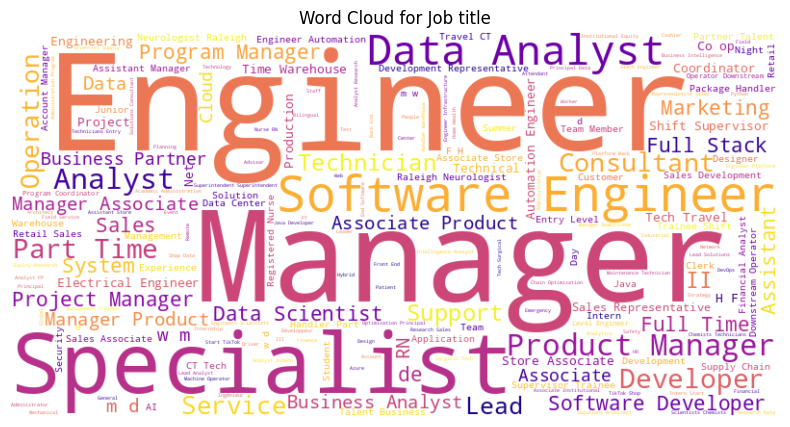

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Word Cloud for Job title
from wordcloud import WordCloud
import matplotlib.pyplot as plt
job_title = ' '.join(merged_df['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(job_title)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job title')
plt.show()
plt

In [ ]:
fig = px.box(
    merged_df,
    x='job_type',
    y='job_seniority_level',
    color='job_type',
    template='seaborn',
    labels={'job_type': 'Job Type', 'job_seniority_level': 'Seniority Level'},
    title='<b>Job Seniority Levels by Type of Employment</b>'
)

fig.show()

# __Statistics with Machine Learning__
- by Michelle



## MCA with K-Means Clustering

Since our data is almost entirely categorical, I chose to use MCA (Multiple Correspondence Analysis) along with K-Means clustering to find natural groupings within the job posting data. MCA operates like PCA, but instead using numerical data as PCA does, it utilizes our categorical data.

Interpreting the results:
- MCA was used to reduce the high-dimensional categorical data for visualization while preserving key variance.
- K-Means was then applied to the MCA output to group similar job postings into 4 clusters.
- Centroids (cluster centers) were overlaid to show where the true center of the cluster was.
- Each cluster was then interpreted based on dominant job titles, fields, and extracted skills.

In [ ]:
job_fields = {
    "Software Development": software_dev_job_titles,
    "Data Analyst": data_analyst_job_titles,
    "Data Science": data_scientist_job_titles,
    "Enterprise Systems": enterprise_systems_job_titles,
    "Systems Security": systems_security_job_titles,
    "Digital Media": digital_media_job_titles
}

# function to classify job titles
def categorize_job_field(job_title):
    for field, keywords in job_fields.items():
        if isinstance(job_title, str) and any(re.search(rf'\b{re.escape(keyword)}\b', job_title, re.IGNORECASE) for keyword in keywords):
            return field
    return "Other"

# create the column for classified job titles
merged_df["job_field"] = merged_df["job_title"].apply(categorize_job_field)



--- Cluster 0 ---


,count
job_field,
Other,29
Software Development,5
Digital Media,2
Data Analyst,1


,count
job_title,
Application Security Engineer Intern (Summer 2025),2
Internship Student - Engineering,1
STAGE - Assistant(e) Global Streaming Manager (F/H/X) - Janvier 2025,1
Technical CTO | Startup Founder,1
Public Relations - Intern,1



--- Cluster 1 ---


,count
job_field,
Other,500
Data Analyst,164
Software Development,146
Digital Media,20
Enterprise Systems,16


,count
job_title,
Product Manager,31
Associate Product Manager,27
Automation Engineer,21
Neurologist - Raleigh,19
Talent Business Partner,17



--- Cluster 2 ---


,count
job_field,
Other,490
Software Development,183
Data Analyst,23
Digital Media,22
Data Science,6


,count
job_title,
Software Engineer,8
Software Developer,7
Data Analyst,6
Data Engineer,6
Full Stack Engineer,6



--- Cluster 3 ---


,count
job_field,
Other,904
Software Development,18
Digital Media,8
Data Analyst,7
Enterprise Systems,3


,count
job_title,
Store Associate,19
Shift Supervisor Trainee,18
Travel CT Tech,15
Package Handler - Part Time (Warehouse like),14
SUD Licensed Mental Health Therapist | Telehealth,8


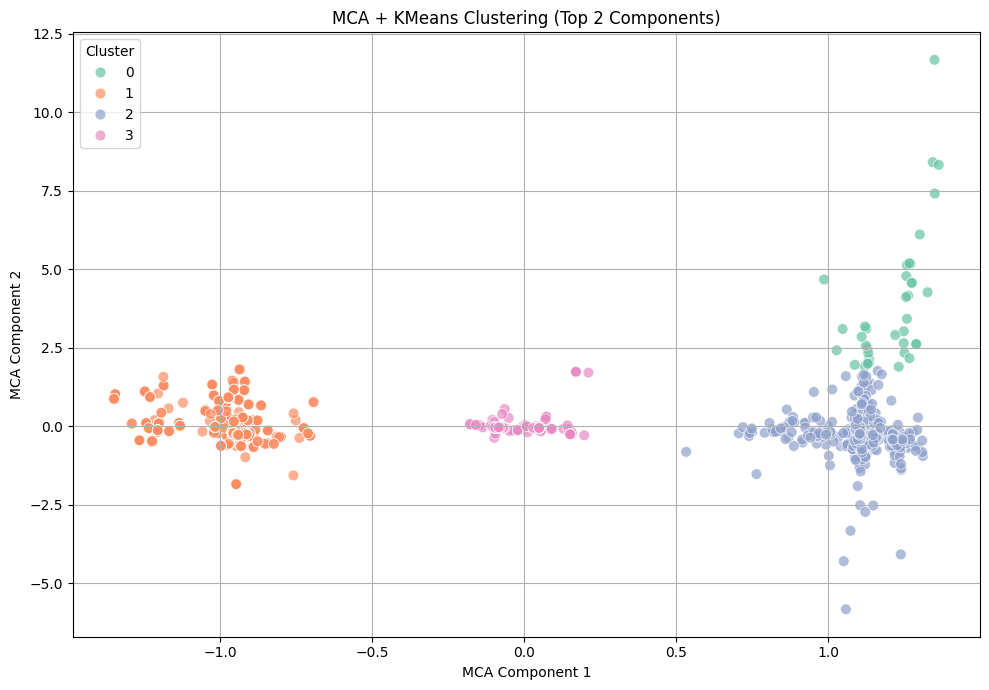

In [ ]:
import prince  # For MCA
from sklearn.cluster import KMeans
from IPython.display import display


# select categorical columns
cat_cols = merged_df.select_dtypes(include='object').columns.tolist()

# dropping job description column as they are very wordy and long
cat_cols = [col for col in cat_cols if col not in ['job_description']]

# fill missing values
mca_df = merged_df[cat_cols].fillna("Unknown")

# fit the mca
mca = prince.MCA(n_components=2, random_state=42)
mca_components = mca.fit_transform(mca_df)

# apply k-means clustering on the mca output
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(mca_components)

# adding basic cluster and field labels
mca_components = mca_components.copy()
mca_components['Cluster'] = clusters
mca_components['job_field'] = mca_df['job_field'].values

# add cluster labels back to data frame
merged_df['Cluster'] = clusters

# analyzing makeup of each cluster
for i in range(4):  # number of clusters
    print(f"\n--- Cluster {i} ---")
    display(merged_df[merged_df['Cluster'] == i]['job_field'].value_counts().head())
    display(merged_df[merged_df['Cluster'] == i]['job_title'].value_counts().head())
    # display(merged_df[merged_df['Cluster'] == i]['skills'].explode().value_counts().head())

# plot mca points by color coded cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=mca_components,
    x=0, y=1,
    hue='Cluster',
    palette='Set2',
    alpha=0.7,
    s=60
)
plt.title("MCA + KMeans Clustering (Top 2 Components)")
plt.xlabel("MCA Component 1")
plt.ylabel("MCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# map job fields to their corresponding skill keyword lists
skills_by_field = {
    "Software Development": software_dev_skills,
    "Data Analyst": data_analyst_skills,
    "Data Science": data_scientist_skills,
    "Enterprise Systems": enterprise_systems_skills,
    "Systems Security": systems_security_skills,
    "Digital Media": digital_media_skills
}

# function to extract skills from job description based on job field
def extract_skills(row):
    job_field = row['job_field']
    description = str(row.get('job_description', '')).lower()

    if job_field in skills_by_field:
        relevant_skills = skills_by_field[job_field]
        matched_skills = [
            skill for skill in relevant_skills
            if re.search(rf'\b{re.escape(skill.lower())}\b', description)
        ]
        return matched_skills if matched_skills else ["No Match"]
    return ["No Match"]

# apply function across dataset
merged_df['skills'] = merged_df.apply(extract_skills, axis=1)


In [ ]:
# this displays the information portion of the visualization

for i in range(4):  # number of clusters
    print(f"\n--- Cluster {i} ---")

    print("\nTop Job Fields:")
    print(merged_df[merged_df['Cluster'] == i]['job_field'].value_counts().head())

    print("\nTop Job Titles:")
    print(merged_df[merged_df['Cluster'] == i]['job_title'].value_counts().head())

    print("\nTop Skills:")
    print(merged_df[merged_df['Cluster'] == i]['skills'].explode().value_counts().head())



--- Cluster 0 ---

Top Job Fields:
job_field
Other                   29
Software Development     5
Digital Media            2
Data Analyst             1
Name: count, dtype: int64

Top Job Titles:
job_title
Application Security Engineer Intern (Summer 2025)                      2
Internship Student - Engineering                                        1
STAGE - Assistant(e) Global Streaming Manager (F/H/X) - Janvier 2025    1
Technical CTO | Startup Founder                                         1
Public Relations - Intern                                               1
Name: count, dtype: int64

Top Skills:
skills
No Match      29
SQL            5
Python         4
Developer      3
Technology     3
Name: count, dtype: int64

--- Cluster 1 ---

Top Job Fields:
job_field
Other                   500
Data Analyst            164
Software Development    146
Digital Media            20
Enterprise Systems       16
Name: count, dtype: int64

Top Job Titles:
job_title
Product Manager            

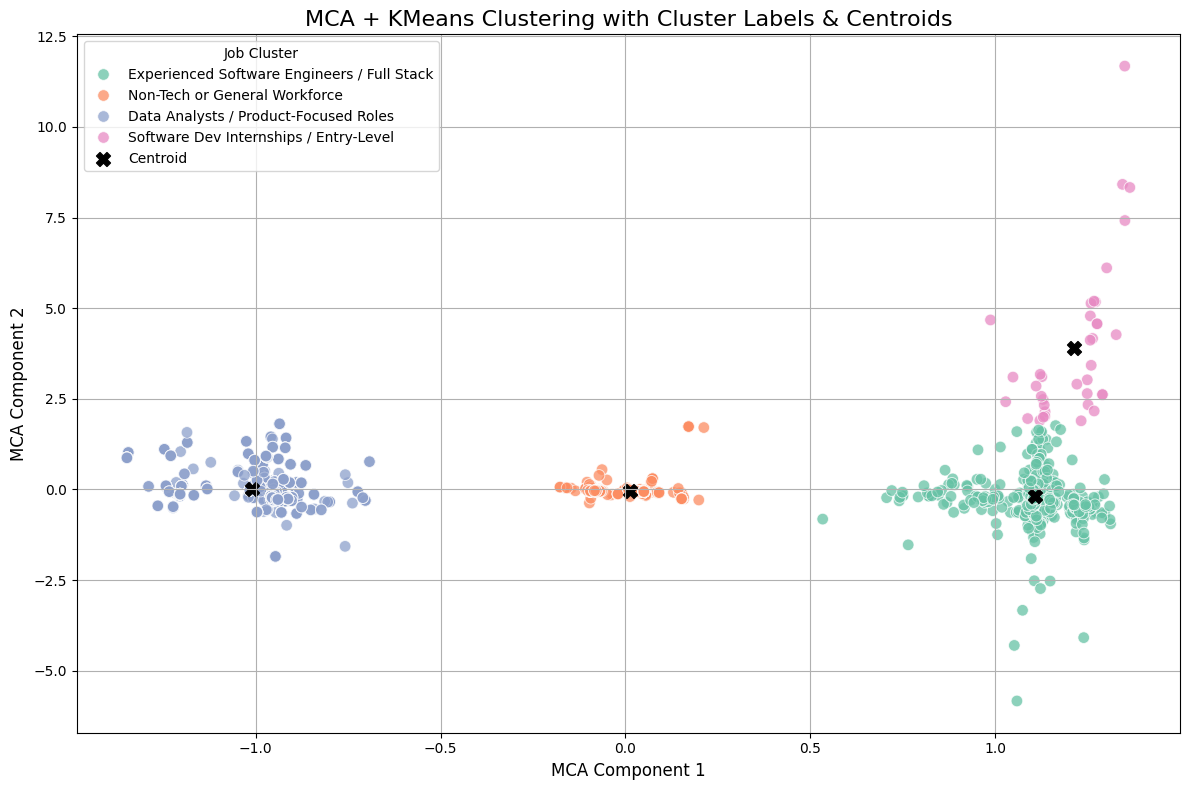

In [ ]:
# cluster label mapping
cluster_labels = {
    0: 'Software Dev Internships / Entry-Level',
    1: 'Data Analysts / Product-Focused Roles',
    2: 'Experienced Software Engineers / Full Stack',
    3: 'Non-Tech or General Workforce'
}

# add readable labels for clusters
mca_components['Cluster Label'] = mca_components['Cluster'].map(cluster_labels)

# calculate centroids
centroids = mca_components.groupby('Cluster')[[0, 1]].mean().reset_index()

# for the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=mca_components,
    x=0, y=1,
    hue='Cluster Label',
    palette='Set2',
    alpha=0.75,
    s=70
)

# add centroid markers
plt.scatter(
    centroids[0], centroids[1],
    color='black',
    marker='X',
    s=100,  # smaller size
    label='Centroid'
)

plt.title("MCA + KMeans Clustering with Cluster Labels & Centroids", fontsize=16)
plt.xlabel("MCA Component 1", fontsize=12)
plt.ylabel("MCA Component 2", fontsize=12)
plt.legend(title='Job Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpreting the clusters:

Experienced Software Engineers/Full Stack:
- Contains job titles like software engineer, full stack developer, data engineer
- Skills include sql, cloud, python, and development
- reflects the technical knowledge needed with diverse backend/frontend skillsets

Non-Tech/General Workforce:
- Contains jobs that aren't relevant to the IT field, e.g. store associate, package handler, etc.
- result of the mixed array of data within the dataset

Data Analysts/Product-Focused Roles:
- Job titles include product manager, data analyst, automation engineer
- Skills include SQL, python, management, and development
- focused on business-data focused jobs/skills combining technical and product experience

Software Dev Internships/Entry Level
- Job titles include software intern, engineering student, assistant manager
- Same skill counts as above, but much lower than the previous clusters
- Reflects entry-level and internship postings where skills are being learned/attained

## Top Contributing Categories

Component 1: Broad Job Category Differentiator
- Driven by job sector, function, and title
- Separates technical/research roles vs real estate/business sectors

Component 2: Job Type and Creative/Media Focus Differentiation
- Separates job type (e.g. internship level)
- Looks at creativity/design roles over analytical/technical roles

In [ ]:
# Step 6: Coordinates of category levels (columns)
category_coords = mca.column_coordinates(mca_df)

# Step 7: Show top contributors to the first 2 components
top_contributors_c1 = category_coords[0].abs().sort_values(ascending=False).head(10)
top_contributors_c2 = category_coords[1].abs().sort_values(ascending=False).head(10)

print("\n🔹 Top Contributors to Component 1:")
print(top_contributors_c1)

print("\n🔹 Top Contributors to Component 2:")
print(top_contributors_c2)



🔹 Top Contributors to Component 1:
company_sector__Real Estate                                                                      1.608758
company_name__Kimco Realty                                                                       1.608758
company_industry__Real Estate                                                                    1.608758
job_title__Research & Data Analyst                                                               1.608758
job_function__Research, Finance, and Other                                                       1.596273
job_title__Data Scientist Intern/Co-op - May 2025                                                1.596273
job_industries__International Trade and Development                                              1.596273
company_name__Olympic Industries ULC                                                             1.596273
job_industries__E-Learning Providers, IT Services and IT Consulting, and Information Services    1.581386
job_title_